In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import random

In [11]:
x_i = range(6)
probs = [0.05, 0.14, 0.27, 0.32, 0.15, 123]

In [13]:
probs[:-1]

[0.05, 0.14, 0.27, 0.32, 0.15]

In [14]:
probs[-1] = 1 - np.sum(probs[:-1])

In [15]:
np.sum(probs)

1.0

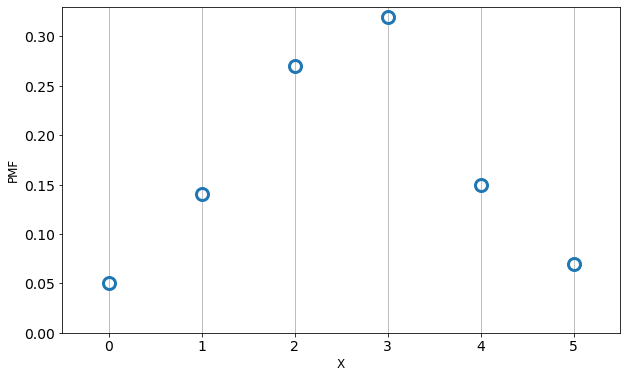

In [17]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
ax.plot(x_i, probs, marker='o', markersize=12, linestyle='None', mfc='None', mew=3)
ax.set_xlim([-0.5, 5.5])
ax.set_xlabel('X')
ax.set_ylabel('PMF')
ax.set_ylim(0, 0.33)
ax.grid(axis='x')

In [41]:
n=5
p0=0.6
k = np.arange(0, 6)
binomial = stats.binom.pmf(k, n, p0)
binomial

array([0.01024, 0.0768 , 0.2304 , 0.3456 , 0.2592 , 0.07776])

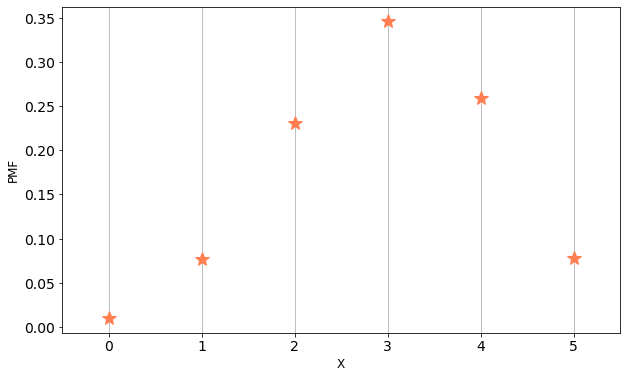

In [42]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
ax.plot(x_i, binomial, marker='*', color='coral', markersize=15, linestyle='None')
ax.set_xlim([-0.5, 5.5])
ax.set_xlabel('X')
ax.set_ylabel('PMF')
ax.grid(axis='x')

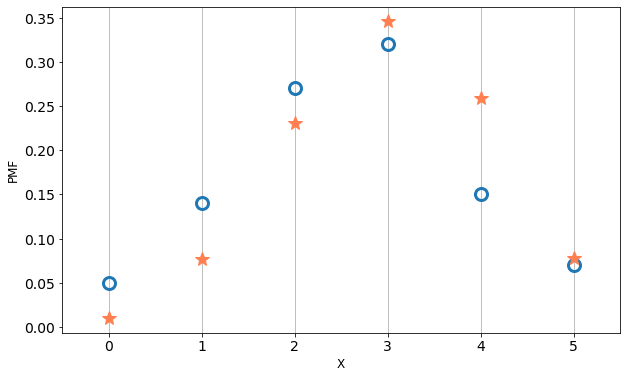

In [43]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
ax.plot(x_i, probs, marker='o', markersize=12, linestyle='None', mfc='None', mew=3)
ax.plot(x_i, binomial, marker='*', color='coral', markersize=15, linestyle='None')
ax.set_xlim([-0.5, 5.5])
ax.set_xlabel('X')
ax.set_ylabel('PMF')
ax.grid(axis='x')

Ahora hay que "subir" la distribución de referencia (VA Y), para que siempre esté por arriba de la distribución que se quiere generar (X)

In [53]:
probs/binomial

array([4.31569476, 1.67946359, 1.12540326, 0.9268858 , 0.60385039,
       0.97912464])

In [57]:
np.array(probs) / (1/6)

array([0.3 , 0.84, 1.62, 1.92, 0.9 , 0.42])

In [58]:
1 / 1.92

0.5208333333333334

In [45]:
c = max(probs/binomial)
print(c)

4.882812499999999


In [46]:
Q = binomial * c

print(Q)

binom_n = binomial*c

[0.05      0.375     1.125     1.6875    1.265625  0.3796875]


Text(0, 0.5, 'PMF')

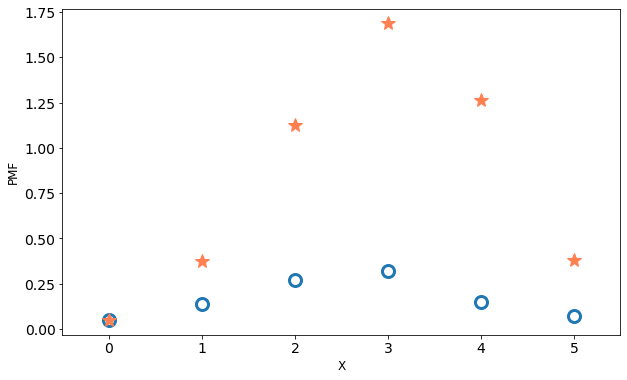

In [47]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
ax.plot(x_i, probs, marker='o', markersize=12, linestyle='None', mfc='None', mew=3)        
ax.plot(x_i, binom_n, marker='*', color='coral', markersize=15, linestyle='None')
ax.set_xlim([-0.5, 5.5])
ax.set_xlabel('X')
ax.set_ylabel('PMF')

In [136]:
Q

array([0.05     , 0.375    , 1.125    , 1.6875   , 1.265625 , 0.3796875])

In [48]:
def simula(M, q, verbose=False):
    """
    parameters
    ----------
    M: (int) cantidad de randoms que quiero generar
    q: (list) lista que contiene la FMP
    
    returns
    -------
    X: numeros randoms
    """
    
    # parametros de la binomial:
    n = 5
    p0 = 0.6
    
    X = []
    k = 0

    while k<M:

        # 1. sortear un numero entre 0 y 5
        r = stats.binom.rvs(n, p0, size=1)[0]                
        u = random.random()
        
        if verbose:
            print(r, q[r], u)
        if u<q[r]:
            X.append(r)
            k = k+1
            if verbose:
                print("accepted")
            
    return X        

In [49]:
p1 = [0.8, 0.1, 0.01, 0.04, 0.05, 0.00]

M = 1000
X = simula(M, p1)

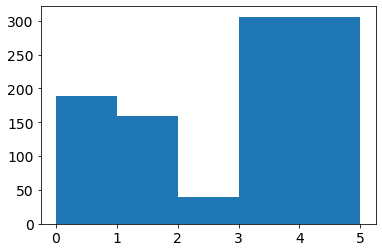

In [50]:
plt.hist(X, bins=x_i)
plt.show()

Probemos con distintas distribuciones de referencia:

In [52]:
p = np.arange(0.4, 0.6, 0.01)
n = 5

for p0 in p:
    k = np.arange(0, 6)
    binomial = stats.binom.pmf(k, n, p0)
    c = max(probs/binomial)
    print(f'{p0:.4f}   {1/c:.5f}')


0.4000   0.14629
0.4100   0.16551
0.4200   0.18670
0.4300   0.21001
0.4400   0.23559
0.4500   0.26361
0.4600   0.29423
0.4700   0.32764
0.4800   0.36401
0.4900   0.40354
0.5000   0.44643
0.5100   0.49289
0.5200   0.50961
0.5300   0.45869
0.5400   0.41193
0.5500   0.36906
0.5600   0.32983
0.5700   0.29402
0.5800   0.26138
0.5900   0.23171
